In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
sc = StandardScaler()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\Jupyter Notebook\datasets\products.csv")

In [3]:
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent,tags,seller_address,meta_description,meta_keyword
0,Slim Fit Casual Shirt,Greenfibre,0.0,0,1699,1699,"38,39,40,42,44",shirts/greenfibre/greenfibre-men-yellow-slim-f...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",shirts,greenfibre,0,0,"clothing,men-clothing,shirts,greenfibre-shirts","25-28, Pariseema Complex,Nr. Lal Bunglow Cross...",Buy Greenfibre Men Yellow Slim Fit Checked Cas...,Greenfibre Men Yellow Slim Fit Checked Casual ...
1,Men Printed T-shirt,FREESOUL,0.0,0,799,799,"S,M,L,XL,XXL",tshirts/freesoul/freesoul-men-white-printed-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,freesoul,0,0,"clothing,men-clothing,tshirts,freesoul-tshirts","21-E1,2ND PHASE, PEENYA INDUSTRIAL AREA,Bengal...",Buy FREESOUL Men White Printed Cotton T Shirt ...,"FREESOUL Men White Printed Cotton T Shirt, FR..."
2,Leather Two Fold Wallet,Da Milano,0.0,0,4499,4499,Onesize,wallets/da-milano/da-milano-women-blue-texture...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,da-milano,0,0,"accessories,women-accessories,wallets,da-milan...","85, Kapashera Bijwasan Road, New DelhiNew Delh...",Buy Da Milano Women Blue Textured Leather Two ...,Da Milano Women Blue Textured Leather Two Fold...
3,Pure Georgette Bandhani Saree,Mitera,3.6,5,6727,1681,Onesize,sarees/mitera/mitera-women-sea-green--white-em...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",sarees,mitera,5046,75,"clothing,women-clothing,sarees,mitera-sarees","7007, Hindustan Textile Centre-2,Dumbhal,Surat...",Buy Mitera Women Sea Green & White Embroidered...,Mitera Women Sea Green & White Embroidered Pur...
4,Men Geometric Printed Kurta,Indo Era,0.0,0,2599,1429,"S,M,L,XL,XXL",kurtas/indo-era/indo-era-men-lavender-geometri...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,indo-era,1170,45,"clothing,men-clothing,kurtas,indo-era-kurtas","4TH FLOOR, Block No B-4021/4022/4023/4026/4038...",Buy Indo Era Men Lavender Geometric Printed Ku...,"Indo Era Men Lavender Geometric Printed Kurta,..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24324 entries, 0 to 24323
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      24324 non-null  object 
 1   brand_name        24324 non-null  object 
 2   rating            24324 non-null  float64
 3   rating_count      24324 non-null  int64  
 4   marked_price      24324 non-null  int64  
 5   discounted_price  24324 non-null  int64  
 6   sizes             24324 non-null  object 
 7   product_link      24324 non-null  object 
 8   img_link          24324 non-null  object 
 9   product_tag       24324 non-null  object 
 10  brand_tag         24324 non-null  object 
 11  discount_amount   24324 non-null  int64  
 12  discount_percent  24324 non-null  int64  
 13  tags              24324 non-null  object 
 14  seller_address    24324 non-null  object 
 15  meta_description  24324 non-null  object 
 16  meta_keyword      24324 non-null  object

In [5]:
df.shape

(24324, 17)

In [6]:
df.isnull().sum()

product_name        0
brand_name          0
rating              0
rating_count        0
marked_price        0
discounted_price    0
sizes               0
product_link        0
img_link            0
product_tag         0
brand_tag           0
discount_amount     0
discount_percent    0
tags                0
seller_address      0
meta_description    0
meta_keyword        0
dtype: int64

In [7]:
#for each column print the unique values

In [8]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

product_name
Slim Fit Casual Shirt                            292
Men Slim Fit Jeans                               209
Women Open Toe Flats                             161
Men Slim Fit Trousers                            131
Casual Shirt                                     126
                                                ... 
Cotton Solid Innerwear Vest                        1
Women Sheath Midi Ribbed Dress                     1
Infant Boys Pack Of 3 Pure Cotton Track Pants      1
Men Pack of 2 Printed Pure Cotton Boxers           1
Women Boxy Casual Shirt                            1
Name: product_name, Length: 10788, dtype: int64


brand_name
Roadster            633
Mast & Harbour      369
DressBerry          311
HERE&NOW            298
max                 289
                   ... 
MASH UNLIMITED        1
Essenza di Wills      1
Softsens              1
India Circus          1
RARE ROOTS            1
Name: brand_name, Length: 2139, dtype: int64


rating
0.0    11551
4.3     1475

In [9]:
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent,tags,seller_address,meta_description,meta_keyword
0,Slim Fit Casual Shirt,Greenfibre,0.0,0,1699,1699,"38,39,40,42,44",shirts/greenfibre/greenfibre-men-yellow-slim-f...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",shirts,greenfibre,0,0,"clothing,men-clothing,shirts,greenfibre-shirts","25-28, Pariseema Complex,Nr. Lal Bunglow Cross...",Buy Greenfibre Men Yellow Slim Fit Checked Cas...,Greenfibre Men Yellow Slim Fit Checked Casual ...
1,Men Printed T-shirt,FREESOUL,0.0,0,799,799,"S,M,L,XL,XXL",tshirts/freesoul/freesoul-men-white-printed-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,freesoul,0,0,"clothing,men-clothing,tshirts,freesoul-tshirts","21-E1,2ND PHASE, PEENYA INDUSTRIAL AREA,Bengal...",Buy FREESOUL Men White Printed Cotton T Shirt ...,"FREESOUL Men White Printed Cotton T Shirt, FR..."
2,Leather Two Fold Wallet,Da Milano,0.0,0,4499,4499,Onesize,wallets/da-milano/da-milano-women-blue-texture...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,da-milano,0,0,"accessories,women-accessories,wallets,da-milan...","85, Kapashera Bijwasan Road, New DelhiNew Delh...",Buy Da Milano Women Blue Textured Leather Two ...,Da Milano Women Blue Textured Leather Two Fold...
3,Pure Georgette Bandhani Saree,Mitera,3.6,5,6727,1681,Onesize,sarees/mitera/mitera-women-sea-green--white-em...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",sarees,mitera,5046,75,"clothing,women-clothing,sarees,mitera-sarees","7007, Hindustan Textile Centre-2,Dumbhal,Surat...",Buy Mitera Women Sea Green & White Embroidered...,Mitera Women Sea Green & White Embroidered Pur...
4,Men Geometric Printed Kurta,Indo Era,0.0,0,2599,1429,"S,M,L,XL,XXL",kurtas/indo-era/indo-era-men-lavender-geometri...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,indo-era,1170,45,"clothing,men-clothing,kurtas,indo-era-kurtas","4TH FLOOR, Block No B-4021/4022/4023/4026/4038...",Buy Indo Era Men Lavender Geometric Printed Ku...,"Indo Era Men Lavender Geometric Printed Kurta,..."


In [10]:
df1= df.drop(['product_name','brand_name','product_link','img_link','brand_tag','tags','seller_address','meta_description','meta_keyword'],axis=1)

In [11]:
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent,tags,seller_address,meta_description,meta_keyword
0,Slim Fit Casual Shirt,Greenfibre,0.0,0,1699,1699,"38,39,40,42,44",shirts/greenfibre/greenfibre-men-yellow-slim-f...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",shirts,greenfibre,0,0,"clothing,men-clothing,shirts,greenfibre-shirts","25-28, Pariseema Complex,Nr. Lal Bunglow Cross...",Buy Greenfibre Men Yellow Slim Fit Checked Cas...,Greenfibre Men Yellow Slim Fit Checked Casual ...
1,Men Printed T-shirt,FREESOUL,0.0,0,799,799,"S,M,L,XL,XXL",tshirts/freesoul/freesoul-men-white-printed-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,freesoul,0,0,"clothing,men-clothing,tshirts,freesoul-tshirts","21-E1,2ND PHASE, PEENYA INDUSTRIAL AREA,Bengal...",Buy FREESOUL Men White Printed Cotton T Shirt ...,"FREESOUL Men White Printed Cotton T Shirt, FR..."
2,Leather Two Fold Wallet,Da Milano,0.0,0,4499,4499,Onesize,wallets/da-milano/da-milano-women-blue-texture...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,da-milano,0,0,"accessories,women-accessories,wallets,da-milan...","85, Kapashera Bijwasan Road, New DelhiNew Delh...",Buy Da Milano Women Blue Textured Leather Two ...,Da Milano Women Blue Textured Leather Two Fold...
3,Pure Georgette Bandhani Saree,Mitera,3.6,5,6727,1681,Onesize,sarees/mitera/mitera-women-sea-green--white-em...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",sarees,mitera,5046,75,"clothing,women-clothing,sarees,mitera-sarees","7007, Hindustan Textile Centre-2,Dumbhal,Surat...",Buy Mitera Women Sea Green & White Embroidered...,Mitera Women Sea Green & White Embroidered Pur...
4,Men Geometric Printed Kurta,Indo Era,0.0,0,2599,1429,"S,M,L,XL,XXL",kurtas/indo-era/indo-era-men-lavender-geometri...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,indo-era,1170,45,"clothing,men-clothing,kurtas,indo-era-kurtas","4TH FLOOR, Block No B-4021/4022/4023/4026/4038...",Buy Indo Era Men Lavender Geometric Printed Ku...,"Indo Era Men Lavender Geometric Printed Kurta,..."


In [12]:
df.sizes.items

<bound method Series.items of 0        38,39,40,42,44
1          S,M,L,XL,XXL
2               Onesize
3               Onesize
4          S,M,L,XL,XXL
              ...      
24319        M,L,XL,XXL
24320      S,M,L,XL,XXL
24321      S,M,L,XL,XXL
24322             S,M,L
24323          S,M,L,XL
Name: sizes, Length: 24324, dtype: object>

In [13]:
df1

,rating,rating_count,marked_price,discounted_price,sizes,product_tag,discount_amount,discount_percent
0,0.0,0,1699,1699,"38,39,40,42,44",shirts,0,0
1,0.0,0,799,799,"S,M,L,XL,XXL",tshirts,0,0
2,0.0,0,4499,4499,Onesize,wallets,0,0
3,3.6,5,6727,1681,Onesize,sarees,5046,75
4,0.0,0,2599,1429,"S,M,L,XL,XXL",kurtas,1170,45
...,...,...,...,...,...,...,...,...
24319,0.0,0,2850,2850,"M,L,XL,XXL",dresses,0,0
24320,0.0,0,1799,1799,"S,M,L,XL,XXL",kurtas,0,0
24321,4.2,214,1299,584,"S,M,L,XL,XXL",tshirts,715,55
24322,4.8,8,999,799,"S,M,L",shirts,200,20


In [14]:
df1.drop(['sizes','product_tag'],axis=1,inplace=True)

In [15]:
df1

,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
0,0.0,0,1699,1699,0,0
1,0.0,0,799,799,0,0
2,0.0,0,4499,4499,0,0
3,3.6,5,6727,1681,5046,75
4,0.0,0,2599,1429,1170,45
...,...,...,...,...,...,...
24319,0.0,0,2850,2850,0,0
24320,0.0,0,1799,1799,0,0
24321,4.2,214,1299,584,715,55
24322,4.8,8,999,799,200,20


# Univariate Analysis

In [16]:
df1.columns

Index(['rating', 'rating_count', 'marked_price', 'discounted_price',
       'discount_amount', 'discount_percent'],
      dtype='object')

In [17]:
numcols=['rating', 'rating_count', 'marked_price', 'discounted_price','discount_amount', 'discount_percent']

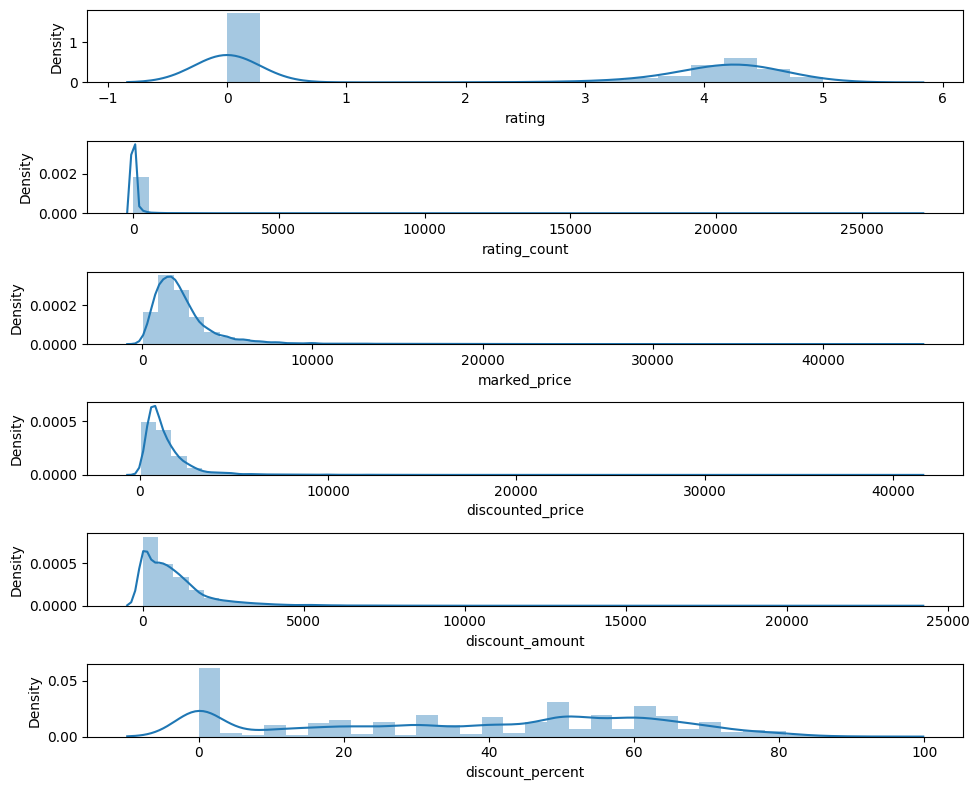

In [18]:
rep=1
nrows=6
ncols=1

plt.figure(figsize=(10,8))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(df1.loc[:,i])
    rep+=1

plt.tight_layout()
plt.show()

# Bivariate Analysis

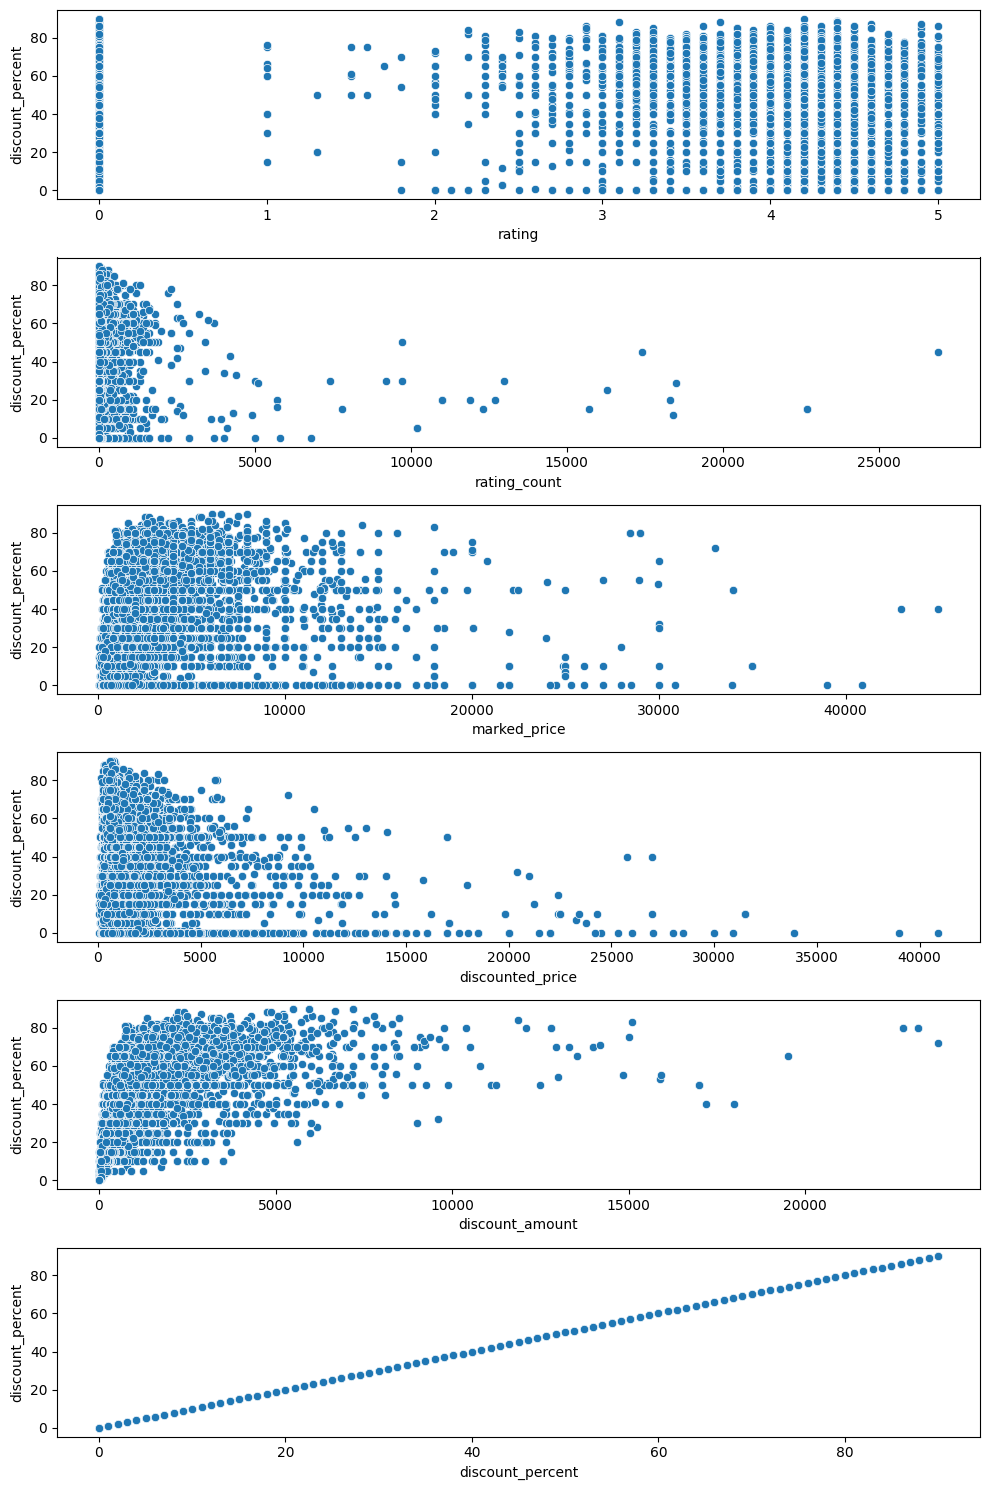

In [19]:
rep=1
nrows=6
ncols=1

plt.figure(figsize=(10,15))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.scatterplot(x=i,y='discount_percent',data=df1)
    rep+=1

plt.tight_layout()
plt.show()

In [20]:
df1 = df1[df1<=15000]

In [21]:
df1.isnull().sum()

rating                0
rating_count          9
marked_price        113
discounted_price     62
discount_amount      13
discount_percent      0
dtype: int64

In [22]:
df1.dropna(inplace=True)

In [23]:
df1.isnull().sum()

rating              0
rating_count        0
marked_price        0
discounted_price    0
discount_amount     0
discount_percent    0
dtype: int64

<Axes: >

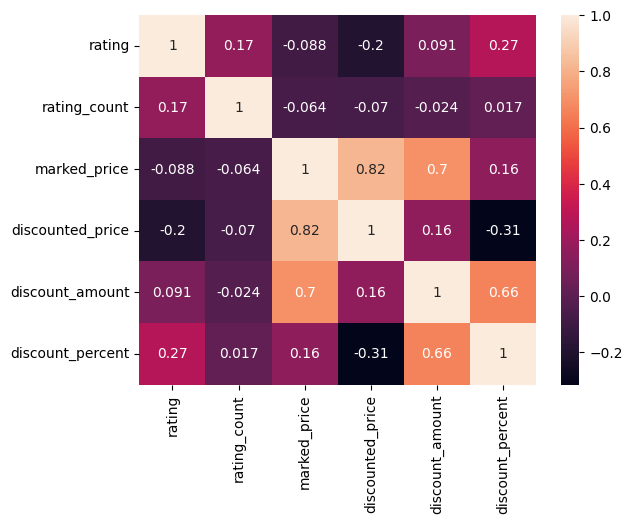

In [24]:
sns.heatmap(df1.corr(),annot=True)

In [25]:
df1.skew()

rating              -0.038674
rating_count        22.775250
marked_price         2.570877
discounted_price     3.683765
discount_amount      2.500366
discount_percent    -0.201087
dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [27]:
df2 = pd.DataFrame(sc.fit_transform(df1),columns=df1.columns)

In [28]:
df2

,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
0,-1.041087,-0.175861,-0.365931,0.205872,-0.881858,-1.501069
1,-1.041087,-0.175861,-0.850670,-0.463740,-0.881858,-1.501069
2,-1.041087,-0.175861,1.142143,2.289109,-0.881858,-1.501069
3,0.671086,-0.160453,2.342140,0.192480,3.772222,1.531881
4,-1.041087,-0.175861,0.118807,0.004989,0.197268,0.318701
...,...,...,...,...,...,...
24197,-1.041087,-0.175861,0.253995,1.062231,-0.881858,-1.501069
24198,-1.041087,-0.175861,-0.312072,0.280273,-0.881858,-1.501069
24199,0.956449,0.483602,-0.581371,-0.623703,-0.222392,0.723094
24200,1.241811,-0.151208,-0.742950,-0.463740,-0.697392,-0.692283


In [29]:
from scipy.stats import yeojohnson
yj= yeojohnson

In [30]:
for column in df1.columns:
    df2[column], _ = yeojohnson(df2[column])

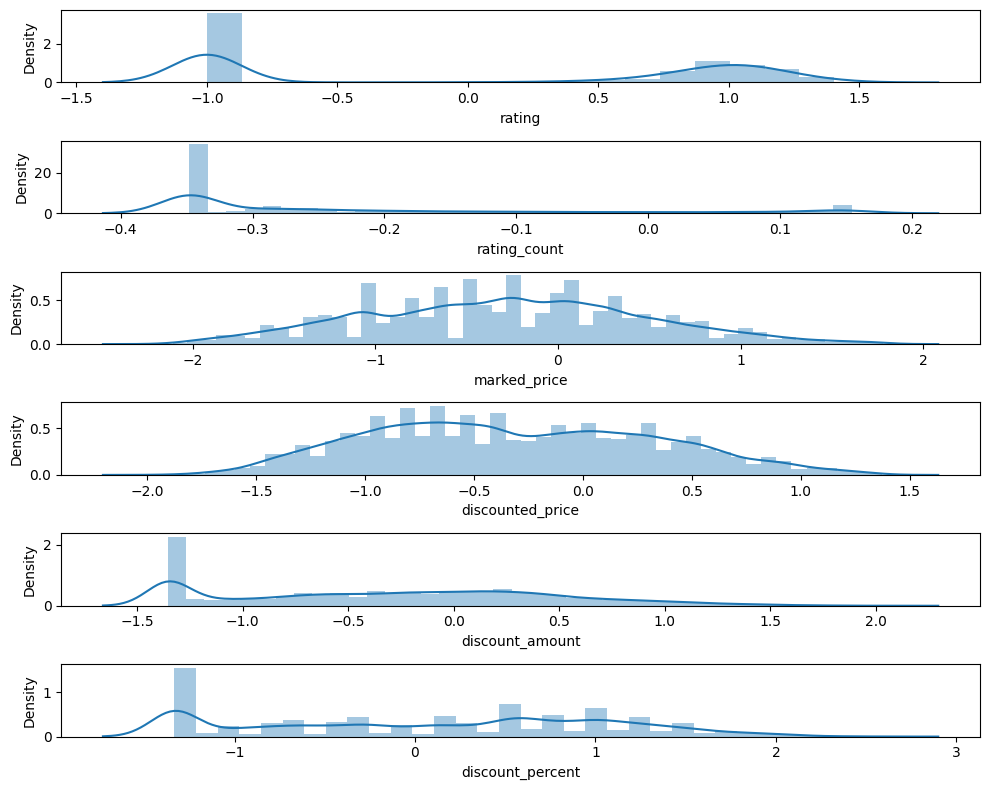

In [31]:
rep=1
nrows=6
ncols=1

plt.figure(figsize=(10,8))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(df2.loc[:,i])
    rep+=1

plt.tight_layout()
plt.show()

<Axes: >

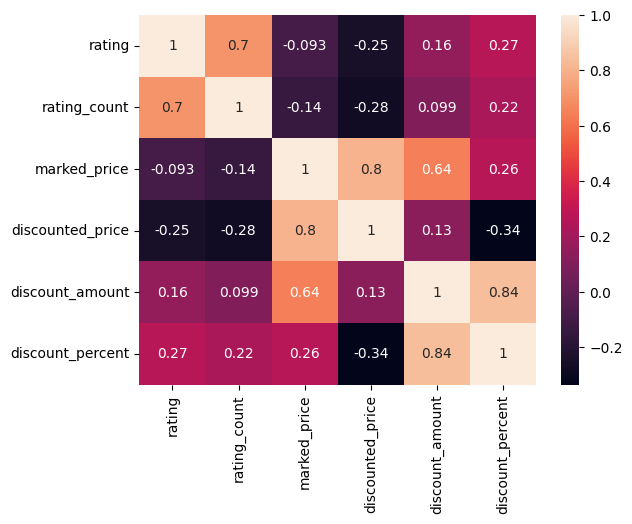

In [32]:
sns.heatmap(df2.corr(),annot=True)

# Model Building

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df2.drop('discount_percent',axis=1)
y= df2.discount_percent

xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=2,test_size=0.30)
xtrainc= sma.add_constant(xtrain)
xtestc= sma.add_constant(xtest)

In [35]:
import statsmodels.api as sma
import statsmodels.formula.api as sfa

In [36]:
m1 = sma.OLS(ytrain,xtrainc).fit()

In [37]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       discount_percent   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 6.840e+04
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:46:15   Log-Likelihood:                 1907.4
No. Observations:               16941   AIC:                            -3803.
Df Residuals:                   16935   BIC:                            -3756.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0390      0.004      9.273      0.000       0.031       0.047
rating               0.0118      0.002      4.987      0.000       0.007       0.016
rating_count        -0.0365      0.014     -2.542      0.011      -0.065      -0.008
marked_price         1.1241      0.009    122.594      0.000       1.106       1.142
discounted_price    -1.6526      0.008   -197.766      0.000      -1.669      -1.636
discount_amount      0.5517      0.005    101.864      0.000       0.541       0.562
==============================================================================
Omnibus:                     6865.200   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32186.866
Skew:                          -1.952   Prob(JB):                         0.00
Kurtosis:                       8.509   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# R2 and Adjusted R2 are good and show that the model is performing well.
# Condition number is 15.2 means that the multicolinearity is less.
# Jarque berra is very extreme that is why we can say that data is not normally distributed

In [80]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=4,random_state=2)

In [81]:
m2 = dtr.fit(xtrain,ytrain)

In [82]:
ypred_m2 = m2.predict(xtest)

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [43]:
def allmat1(ytest,ypred,xtrain):
    mse = mean_squared_error(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    rmse = np.sqrt(mse)
    n = xtrain.shape[0]
    k = xtrain.shape[1]
    adj_r2 = 1-(((1-r2)*(n-1))/(n-k-1))
    
    print('MSE:',mse,
         'MAE:',mae,
         'r2:',r2,
         'rmse:',rmse,
          'Adj R2:',adj_r2)

In [83]:
allmat1(ytest,ypred=ypred_m2,xtrain=xtrain)

MSE: 0.09442921103485873 MAE: 0.22019673456386696 r2: 0.9039524783153392 rmse: 0.30729336314808153 Adj R2: 0.9039241206177647


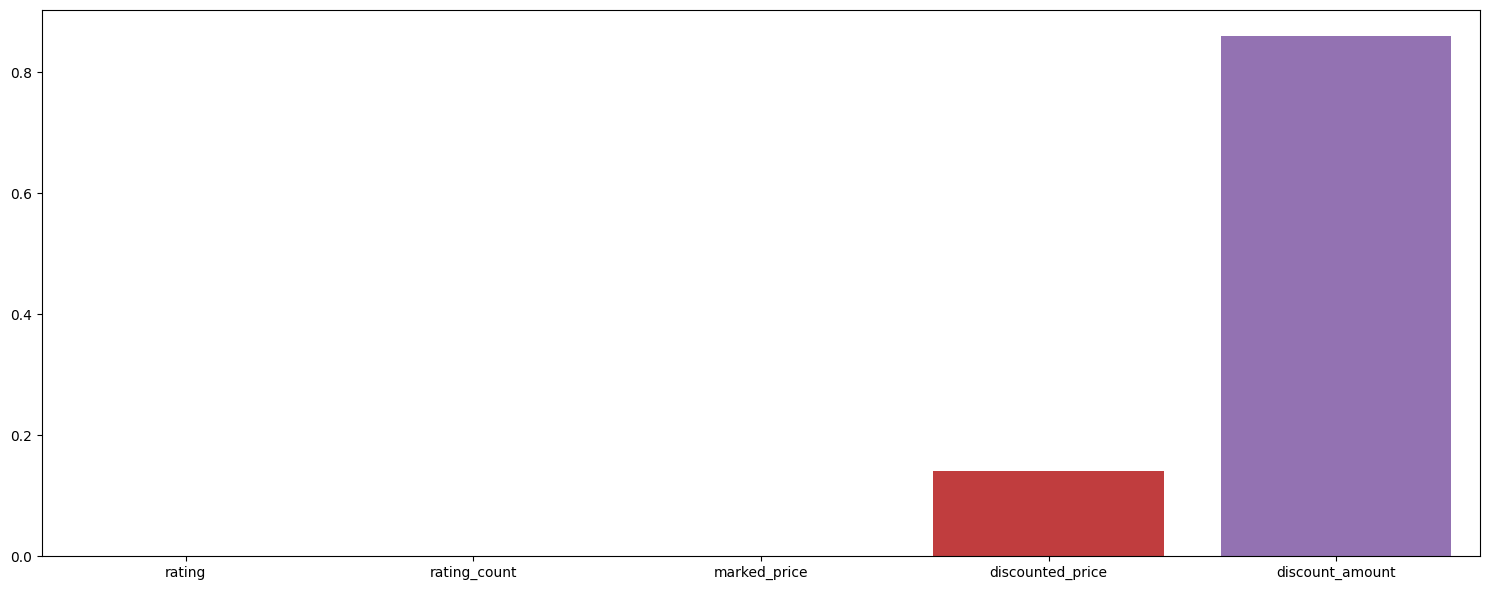

In [85]:
# Feature importance according to the Model 3
plt.figure(figsize=(15,6))
sns.barplot(x = m2.feature_names_in_,y= m2.feature_importances_)
plt.tight_layout()
plt.show()

* According to the model Discount Amount is the Most important variable for prediction of The Discount Percentage.
* In real world it is a practice that Discount Amount is never according to the discount percentage as there are always terms and conditions applied on the discount amount to be provided. This is done so that the discount is feasible for both customers and the company.
* For customers the discount will provide them customer delight